# M√©tricas de regresi√≥n

**Autor:** Jazna Meza Hidalgo

**Correo Electr√≥nico:** ja.meza@profesor.duoc.cl

**Fecha de Creaci√≥n:** Junio 2025

**Versi√≥n:** 1.0  


---

## Descripci√≥n


Este notebook profundiza en la interpretaci√≥n de las m√©tricas de regresi√≥n.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- numpy 2.0.2
- pandas 2.2.2
- matplotlib 3.10.0
- sklearn 1.6.1

Para verificar la versi√≥n instalada ejecutar usando el siguiente comando, usando la librer√≠a de la cual quieres saber la versi√≥n:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Generar dataset sint√©tico
X, y = make_regression(n_samples=300, n_features=4, noise=15, random_state=29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# Distribuci√≥n de la variable objetivo

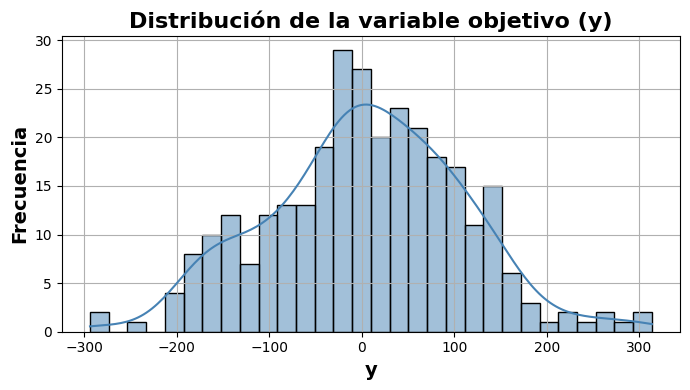

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(y, bins=30, kde=True, color="steelblue")
plt.title("Distribuci√≥n de la variable objetivo (y)", fontsize=16, fontweight="bold")
plt.xlabel("y", fontsize=14, fontweight="bold")
plt.ylabel("Frecuencia", fontsize=14, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()


üëÅ **¬øQu√© buscar en el gr√°fico?**

+ *Sesgo hacia un lado* -> Se podr√≠a considerar transformar a logaritmo.
+ *Distribuci√≥n uniforme* -> Ser√° m√°s f√°cil ajustar modelos precisos.
+ *Distribuci√≥n aproximada a la normal* -> Ideal para regresi√≥n lineal.

# `DecisionTreeRegressor`

## B√∫squeda de hiperpar√°metros con GridSearchCV

In [ ]:
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(random_state=29), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Mejores hiperpar√°metros encontrados:", grid.best_params_)

Mejores hiperpar√°metros encontrados: {'max_depth': 8}


## Evaluaci√≥n del modelo

In [ ]:
# Reentrenar con los mejores par√°metros sobre todo el set de entrenamiento
mejores_params = grid.best_params_
modelo_final = DecisionTreeRegressor(**mejores_params, random_state=29)
modelo_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=29)

In [ ]:
modelo_final.get_depth()

8

In [ ]:
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(f"{'R¬≤ entrenamiento' :<18}: {r2_train:.3f} {'|'} {'MAE entrenamiento' :<18}: {mae_train:.1f}")
print(f"{'R¬≤ prueba' :<18}: {r2_test:.3f} {'|'} {'MAE prueba' :<18}: {mae_test:.1f}")

R¬≤ entrenamiento  : 0.993 | MAE entrenamiento : 4.7
R¬≤ prueba         : 0.849 | MAE prueba        : 31.9


## Visualizaci√≥n - Valores reales vs predicciones

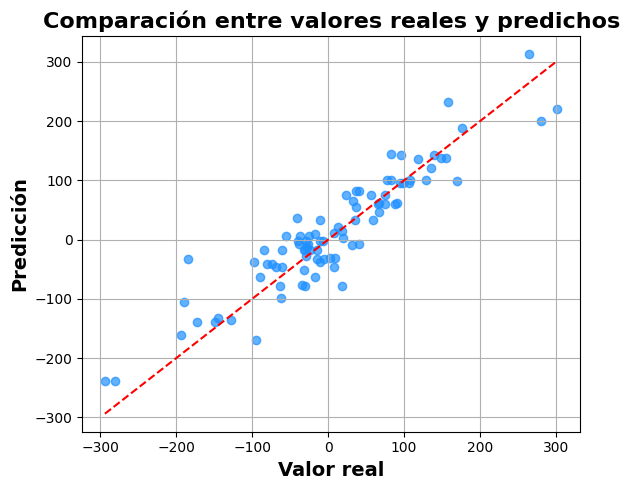

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real", fontsize=14, fontweight="bold")
plt.ylabel("Predicci√≥n", fontsize=14, fontweight="bold")
plt.title("Comparaci√≥n entre valores reales y predichos", fontsize=16, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()

# `LinearRegression`

## GridSearchCV (aunque LinearRegression no tiene muchos hiperpar√°metros)

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Mejores hiperpar√°metros encontrados:", grid.best_params_)

Mejores hiperpar√°metros encontrados: {'fit_intercept': False, 'positive': True}


# Reentrenar modelo final con todos los datos de entrenamiento

In [ ]:
mejores_params = grid.best_params_
modelo_final = LinearRegression(**mejores_params)
modelo_final.fit(X_train, y_train)


LinearRegression(fit_intercept=False, positive=True)

## Evaluaci√≥n

In [ ]:
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(f"{'R¬≤ entrenamiento' :<18}: {r2_train:.3f} {'|'} {'MAE entrenamiento' :<18}: {mae_train:.1f}")
print(f"{'R¬≤ prueba' :<18}: {r2_test:.3f} {'|'} {'MAE prueba' :<18}: {mae_test:.1f}")

R¬≤ entrenamiento  : 0.980 | MAE entrenamiento : 11.6
R¬≤ prueba         : 0.980 | MAE prueba        : 12.2


## Visualizaci√≥n: Predicciones vs valores reales

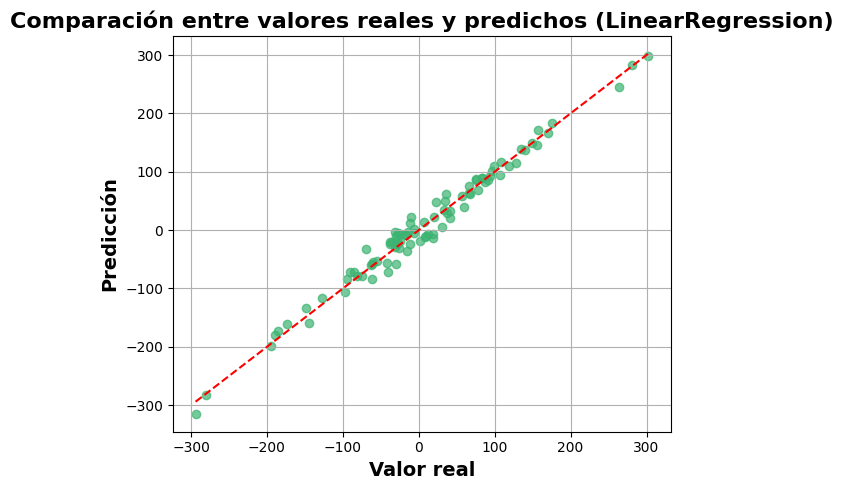

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real", fontsize=14, fontweight="bold")
plt.ylabel("Predicci√≥n", fontsize=14, fontweight="bold")
plt.title("Comparaci√≥n entre valores reales y predichos (LinearRegression)", fontsize=16, fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()


# Interpretaci√≥n de las m√©tricas

**R¬≤ (coeficiente de determinaci√≥n)**
- Mide qu√© proporci√≥n de la variabilidad de la variable dependiente es explicada por el modelo.
- Un valor cercano a 1 indica buen ajuste; puede ser negativo si el modelo es peor que simplemente predecir la media.

**MAE (error absoluto medio)**
- Promedio de la diferencia absoluta entre predicci√≥n y valor real.
- Siempre positivo, cuanto m√°s bajo, mejor.

**Entrenamiento vs Prueba**
- Si R¬≤ y MAE en entrenamiento son mucho mejores que en prueba ‚Üí posible sobreajuste.
- Idealmente ambos deben tener valores similares, sin gran diferencia.


In [ ]:
# Funcinones para ayudar con la interpretaci√≥n de las m√©tricas
def interpretacion(algoritmo : str, score : float, contexto : str, caracteristicas : np.array = None):
  if not caracteristicas == None:
    return f"""Modelo de regresi√≥n {algoritmo}
    {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando: {caracteristicas.values}."""
  else:
    return f"""Modelo de regresi√≥n {algoritmo}
      {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando las variables independientes"""

def mae_interpretacion(modelo : str, value : float, contexto : str):
  print(f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ¬± $ {value:.2f} del valor real.")


In [ ]:
print(interpretacion("LinearRegression", r2_test, "y"))

Modelo de regresi√≥n LinearRegression
      98.02% de la variabilidad en y se puede explicar utilizando las variables independientes


In [ ]:
print(mae_interpretacion("LinearRegression", mae_test, "y"))

El modelo 'LinearRegression' pudo predecir y en el conjunto de prueba con un error de ¬± $ 12.23 del valor real.
None
